# Genetic Algorithms Introductory Notebook:

# Task 1: Extremizing A polynomial within an Interval
### The Following Code Returns a Polynomial Function given a set of coefficients

## Example:
$\left[ \begin{array} ,1&2&3 \end{array} \right]\rightarrow x^2 + 2x + 3 $


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def polynomial_creator(*coeffs):
    """ coefficients are in the form a_n, a_n_1, ... a_1, a_0
    """
    def polynomial(x):
        res = coeffs[0]
        for i in range(1, len(coeffs)):
            res = res * x + coeffs[i]
        return res
    return polynomial

def polynomial_plotter(polynomial, domain, num_points=100, show_plot = True):
    """ plots the polynomial in the given range with the give number of points
    """
    start, stop = domain
    points = np.linspace(start, stop,num_points)
    func_values = polynomial(points)
    plt.plot(points, func_values)
    if show_plot:
        plt.show()

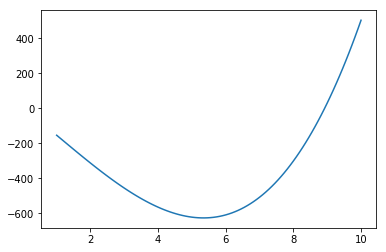

In [2]:
my_polynomial = polynomial_creator(3,-10,-150,3)
polynomial_plotter(my_polynomial, [1, 10])


### In a similar manner fill in the code below to return a multivariate function

## Example:
$\left[ \begin{array} ,1&2&3 \end{array} \right] , \left[ \begin{array} ,18&14&6&3 \end{array} \right] , \left[ \begin{array} ,12&3 \end{array} \right] \rightarrow f(x_1, x_2, x_3) = x_1^2 + 2x_1 + 3 + 18x_2^4 + 14x_2^3 + 6x_2^2 + 3x + 12x_3^2 + 3x $

### NOTE : The value of constant is given as the value of the first variable
Hint: You may use the polynomial creator function defined above


#### Optional/Bonus : Find a method to plot it
[How to plot multivariate functions](http://geog.uoregon.edu/bartlein/courses/geog495/lec05.html)


In [6]:
def multi_creator(*coefs) :
    def multivariate_function(*x) :
        polynomial = 0 
        for i in range(0 , len(x)) :
            poly = polynomial_creator(*coefs[i])
            polynomial = polynomial + poly(x[i])
        return polynomial
    return multivariate_function

polynomial = multi_creator((1,2,3) , (18,14,6,3) , (12,3))
print(polynomial(1,0,0))

12


# Now lets extremize it! (Using genetic algoritms)
Problem : Find the maxima of this function using genetic algos
For this we require
1. Fitness function
2. An encoder function
3. A mating function

## Notations
1. $n$ : The number of variables in the multivariate funtion
2. $m$ : Size of the population
3. $R_i$ : Range of the ith variable, as a tuple with max and min

## Fitness function
This is the function that our model will try to maximize. Since our goal is to maximize the multivariable polynomial, it will become our fitness function

## Encoder function
This functions takes in input genes and transforms its into meaningfull values of the variables.
#### Genes
For the purpose of this excercise, genes of the population are represented 2D numpy array of shape (n,m). **Our genes will only take values between -5 and 5**
#### Example
1. Polynomial $x_1 + x_2^2 + x_3 - x_3^3$
2. Population size :m=5
3. Ranges : (-3, 4), (-1, 2), (3, 9)
##### Input (Gene Pool)
$\left[ \begin{array}4.9&2.8&-3.4\\-3.5&1.4&4.5\\0.6&-3&1.8\\0.55&3.8&4.0\\-2& 2.6& 3 \end{array}\right]$
##### Output (Fitness Values)
$\left[ \begin{array} -52.413 & \\
-650.906 & \\
-346.734 & \\
-580.729 & \\
-466.014 & \\
-26.000 & \\
\end{array}\right]$

## Mating Funtion
This consists of :
1. Mutation Function - Input = Gene : Output = Slightly modified gene
2. Crossover function - Input = 2 genes : Output =  Crossovered genes

Of each gene pool only the top few are selected and mated to get the gene pool of the next iteration.

#### Note
The following illustration will introduce you to the basics of Genetic algorithms. We insist you to write a mutation function and a crossover function on your own. 
[This](https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6) might inspire you.

In [13]:
import numpy as np
import random
import math

# Determines the number of genes in each member of the population, in our case which is the number of variables in the equation
numberOfVariables = 3

# Determines the size of the population, which is going to remain constant throughout
populationSize = 20

# Determines the probablity of a random mutation occouring in a gene
mutationChance = 0.005

# Determines how much percent of the population survives to become parents
survivalRate = 0.4

# Determines how much percent of the new population is formed by mating the parents from the previous generation
populationPrportionFromOld = 0.9

# Determines for how many generations the code would run
generations = 100

# This variable stores the ranges of every variable
ranges = np.array([[-3 , 4] , [-1 , 2] , [3 , 9]])

# This variable stores the shape of the numpy array that would be requied to store all the genes of the population
genePoolShape = (populationSize , numberOfVariables)

# This is used to create the polynomial whose value we have to extremize
polynomial = multi_creator((1,0) , (1,0,0) , (-1,0,1,0))

# This variable is used to store the current genes of the entire population
population = np.zeros(genePoolShape)

# This variable is used to store the normalized values of the genes of the current population
values = np.zeros(populationSize)


# This function is used to set up the initial population by using random numbers
def initialPopulation() : 
    return np.random.uniform(low = ranges[: , 0], high = ranges[: , 1], size = genePoolShape)

# This function finds the values of the polynomial at the different points, and stores them in an array
# It also noramlizes the values to the range of [-5 , 5], which is not yet implemented
def encoderFunction() :
    values[:populationSize] = [polynomial(*(i)) for i in population]

# This function is used to create mutations in the gene. I have assumed the probablity of mutation as "mutationChance"
def mutation(gene) :
    for i in range(0 , len(gene)) :
        if mutationChance >= random.random() :
            gene[i] = random.uniform(ranges[i][0] , ranges[i][1])

# This function takes two parents as input, and produces two childre, with combined genes as the output
# Here I have only taken a one point crossoverbetween the parents
def crossover(gene1 , gene2) :
    crossPosition = np.random.randint(1 , numberOfVariables)
    temp = gene1[crossPosition :]
    return [np.concatenate((gene1[: crossPosition] , gene2[crossPosition :])) , np.concatenate((gene2[: crossPosition] , temp))]

# This function is used to select which individuas are fit enough to be parents for the next generation
# Only the top "survivalRate" percent of the iindividuals are selected as parents
def selectionOfParents() :
    parents = np.zeros((math.floor(survivalRate * populationSize) , numberOfVariables))
    for i in range(0 , math.floor(survivalRate * populationSize)) :
        parents[i] = population[np.argmax(values)]
        values[np.argmax(values)] = -9999999999
    return parents
    
# This function decides which parent is to be mated with which other parent
# It makes use of the crossover and the mutation function to determine the offsprings for the next generation
# It generates "populationPrportionFromOld" percent of offsprings from the selected parents. The remaining are selected randomly from the previous population
def matingFunction() :
    # Stores the copy of the current population so that we can select random individuals from it later on
    populationCopy = np.copy(population)
    parents = selectionOfParents()
    # Generate a random list to select which individuals are mated with whom
    randomList = np.random.randint(0 , populationSize - 1 , size = math.floor(populationPrportionFromOld * populationSize * 2))
    for i in range(0 , math.floor(populationPrportionFromOld * populationSize) - 2 , 2) :
        # We need to ensure that the same individual is not the mother and the father at the same time
        if randomList[i] == randomList[i+1] :
            randomList[i + 1] += 1
        listOfNewGenes = crossover(parents[randomList[i] % len(parents)] , parents[randomList[i + 1] % len(parents)])
        population[i] = listOfNewGenes[0]
        population[i + 1] = listOfNewGenes[1]
        mutation(population[randomList[i]])
        mutation(population[randomList[i + 1]])
    # This is to select the remaining individuals randomly from the orignal population
    smallPopulation = np.zeros((math.ceil((1 - populationPrportionFromOld) * populationSize) , numberOfVariables))
    smallPopulation[:math.ceil((1 - populationPrportionFromOld) * populationSize)] = population[np.random.randint(0 , populationSize - 1 , size = math.ceil((1 - populationPrportionFromOld) * populationSize))]
    return np.concatenate((population , smallPopulation))


In [14]:
population = initialPopulation()
for i in range(0 , generations) :
    encoderFunction()
    matingFunction()
    encoderFunction()
    print("Maximum value after generation = ")
    print(values[np.argmax(values)])

Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-22.282948477280186
Maximum value after generation = 
-21.48047005624791
Maximum value after generation = 
-21.48047005624791
Maximum value after generation = 
-21.48047005624791
Maximum value after generation = 
-21.48047005624791
Maximum value after generation = 
-21.48047005624791
Maximum value after generation = 
-21.48047005624791
Maximum value after generation = 
-21.48047005624791
Maximum value after generation = 
-